# Taxonomy Data Analysis: NCBI vs Wikipedia Evaluation

This notebook analyzes taxonomic data extracted from NCBI and Wikipedia infoboxes, creates heatmaps showing data completeness, and calculates evaluation metrics including precision, accuracy, macro precision, F1-score, and recall.

## Overview
- **Extracted Data**: Taxonomy classifications from NCBI and Wikipedia
- **Reference Data**: Ground truth taxonomy data for comparison
- **Metrics**: Precision, Recall, F1-Score, Accuracy, and more
- **Visualizations**: Heatmaps, confusion matrices, and comparative charts

## 1. Import Required Libraries

In [17]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           confusion_matrix, classification_report, precision_recall_fscore_support)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ All required libraries imported successfully!")
print("📊 Ready for taxonomy data analysis and evaluation")

✅ All required libraries imported successfully!
📊 Ready for taxonomy data analysis and evaluation


## 2. Load and Explore Taxonomic Data

In [18]:
# Load the extracted taxonomy data (from NCBI and Wikipedia)
extracted_data_path = r"C:\Users\sahan\Desktop\dse\Genealogy-Tree-Creator\research\animal\buetifulsoa extraction\result.csv"
reference_data_path = r"C:\Users\sahan\Desktop\dse\Genealogy-Tree-Creator\research\animal\buetifulsoa extraction\test.csv"

# Load datasets
print("📥 Loading taxonomy datasets...")
df_extracted = pd.read_csv(extracted_data_path)
df_reference = pd.read_csv(reference_data_path)

print(f"✅ Extracted data loaded: {df_extracted.shape[0]} rows, {df_extracted.shape[1]} columns")
print(f"✅ Reference data loaded: {df_reference.shape[0]} rows, {df_reference.shape[1]} columns")

# Display basic information about the datasets
print("\n" + "="*60)
print("🔍 EXTRACTED DATA OVERVIEW")
print("="*60)
print(f"Shape: {df_extracted.shape}")
print(f"Columns: {list(df_extracted.columns)}")
print("\nFirst 3 rows:")
display(df_extracted.head(3))

print("\n" + "="*60)
print("🔍 REFERENCE DATA OVERVIEW") 
print("="*60)
print(f"Shape: {df_reference.shape}")
print(f"Columns: {list(df_reference.columns)}")
print("\nFirst 3 rows:")
display(df_reference.head(3))

📥 Loading taxonomy datasets...
✅ Extracted data loaded: 100 rows, 29 columns
✅ Reference data loaded: 118 rows, 29 columns

🔍 EXTRACTED DATA OVERVIEW
Shape: (100, 29)
Columns: ['domain', 'kingdom', 'subkingdom', 'superphylum', 'phylum', 'subphylum', 'superclass', 'class', 'subclass', 'infraclass', 'superorder', 'order', 'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 'tribe', 'subtribe', 'genus', 'subgenus', 'species', 'subspecies', 'variety', 'form', 'morph', 'strain', 'Animal Name']

First 3 rows:


,domain,kingdom,subkingdom,superphylum,phylum,subphylum,superclass,class,subclass,infraclass,...,subtribe,genus,subgenus,species,subspecies,variety,form,morph,strain,Animal Name
0,Eukaryota,Animalia,Eumetazoa,Deuterostomia,Chordata,Vertebrata,NaN,Mammalia,Theria,Placentalia,...,Hominina,Homo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Homo sapiens
1,Eukaryota,Animalia,Eumetazoa,Deuterostomia,Chordata,Vertebrata,NaN,Mammalia,Theria,Placentalia,...,Canina,Canis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canis lupus familiaris
2,Eukaryota,Animalia,Eumetazoa,Deuterostomia,Chordata,Vertebrata,NaN,Mammalia,Theria,Placentalia,...,NaN,Felis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Felis catus



🔍 REFERENCE DATA OVERVIEW
Shape: (118, 29)
Columns: ['domain', 'kingdom', 'subkingdom', 'superphylum', 'phylum', 'subphylum', 'superclass', 'class', 'subclass', 'infraclass', 'superorder', 'order', 'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 'tribe', 'subtribe', 'genus', 'subgenus', 'species', 'subspecies', 'variety', 'form', 'morph', 'strain', 'Animal Name']

First 3 rows:


,domain,kingdom,subkingdom,superphylum,phylum,subphylum,superclass,class,subclass,infraclass,...,subtribe,genus,subgenus,species,subspecies,variety,form,morph,strain,Animal Name
0,Eukaryota,Metazoa,NaN,NaN,Chordata,Craniata,Sarcopterygii,Mammalia,NaN,NaN,...,NaN,Homo,NaN,Homo sapiens,NaN,NaN,NaN,NaN,NaN,Homo sapiens
1,Eukaryota,Metazoa,NaN,NaN,Chordata,Craniata,Sarcopterygii,Mammalia,NaN,NaN,...,NaN,Canis,NaN,Canis lupus familiaris,NaN,NaN,NaN,NaN,NaN,Canis lupus familiaris
2,Eukaryota,Metazoa,NaN,NaN,Chordata,Craniata,Sarcopterygii,Mammalia,NaN,NaN,...,NaN,Felis,NaN,Felis catus,NaN,NaN,NaN,NaN,NaN,Felis catus


## 3. Data Preprocessing and Cleaning

In [19]:
# Define taxonomic levels for analysis
taxonomic_levels = ['domain', 'kingdom', 'subkingdom', 'superphylum', 'phylum', 'subphylum', 
                   'superclass', 'class', 'subclass', 'infraclass', 'superorder', 'order', 
                   'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 
                   'tribe', 'subtribe', 'genus', 'subgenus', 'species']

print("🧹 Cleaning and preprocessing taxonomy data...")

# Function to clean and standardize data
def clean_taxonomy_data(df, name="dataset"):
    df_clean = df.copy()
    
    # Replace empty strings and NaN with None for consistency
    df_clean = df_clean.replace('', np.nan)
    
    # Count missing values for each taxonomic level
    missing_counts = df_clean[taxonomic_levels].isnull().sum()
    
    print(f"\n📊 Missing values in {name}:")
    for level, count in missing_counts.items():
        percentage = (count / len(df_clean)) * 100
        print(f"  {level:15s}: {count:3d} ({percentage:5.1f}%)")
    
    return df_clean

# Clean both datasets
df_extracted_clean = clean_taxonomy_data(df_extracted, "Extracted Data")
df_reference_clean = clean_taxonomy_data(df_reference, "Reference Data")

print(f"\n✅ Data cleaning completed!")
print(f"   Extracted data: {len(df_extracted_clean)} species")
print(f"   Reference data: {len(df_reference_clean)} species")

🧹 Cleaning and preprocessing taxonomy data...

📊 Missing values in Extracted Data:
  domain         :   0 (  0.0%)
  kingdom        :   0 (  0.0%)
  subkingdom     :   0 (  0.0%)
  superphylum    :   0 (  0.0%)
  phylum         :   0 (  0.0%)
  subphylum      :   0 (  0.0%)
  superclass     : 100 (100.0%)
  class          :   0 (  0.0%)
  subclass       :  23 ( 23.0%)
  infraclass     :  23 ( 23.0%)
  superorder     :  17 ( 17.0%)
  order          :   0 (  0.0%)
  suborder       :  26 ( 26.0%)
  infraorder     :  58 ( 58.0%)
  parvorder      :  90 ( 90.0%)
  superfamily    :  42 ( 42.0%)
  family         :   0 (  0.0%)
  subfamily      :  28 ( 28.0%)
  tribe          :  59 ( 59.0%)
  subtribe       :  94 ( 94.0%)
  genus          :   0 (  0.0%)
  subgenus       : 100 (100.0%)
  species        : 100 (100.0%)

📊 Missing values in Reference Data:
  domain         :   0 (  0.0%)
  kingdom        :   0 (  0.0%)
  subkingdom     : 118 (100.0%)
  superphylum    : 118 (100.0%)
  phylum        

## 4. Create Taxonomic Hierarchy Heatmap

🎨 Creating taxonomic data completeness heatmap...


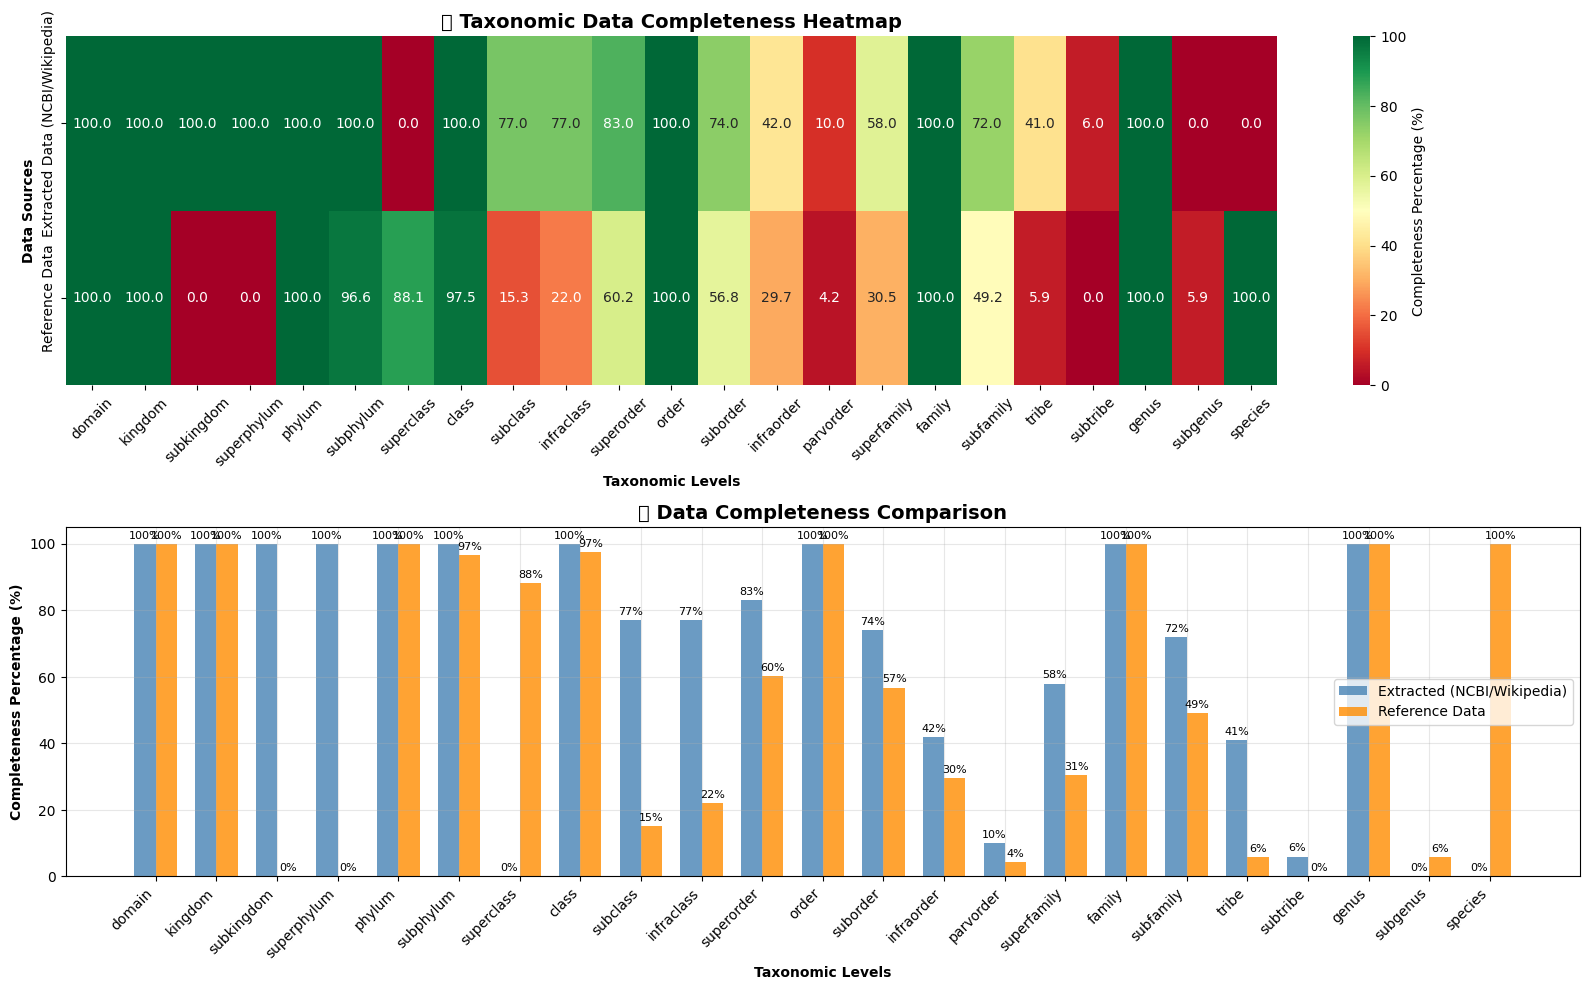

In [20]:
# Create heatmap showing data completeness for both datasets
print("🎨 Creating taxonomic data completeness heatmap...")

# Calculate completeness percentages for visualization
extracted_completeness = []
reference_completeness = []

for level in taxonomic_levels:
    # Calculate non-null percentages
    ext_complete = ((df_extracted_clean[level].notna()).sum() / len(df_extracted_clean)) * 100
    ref_complete = ((df_reference_clean[level].notna()).sum() / len(df_reference_clean)) * 100
    
    extracted_completeness.append(ext_complete)
    reference_completeness.append(ref_complete)

# Create completeness data for heatmap
completeness_data = pd.DataFrame({
    'Extracted Data (NCBI/Wikipedia)': extracted_completeness,
    'Reference Data': reference_completeness
}, index=taxonomic_levels)

# Create the heatmap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Main heatmap
sns.heatmap(completeness_data.T, 
           annot=True, 
           fmt='.1f', 
           cmap='RdYlGn', 
           cbar_kws={'label': 'Completeness Percentage (%)'}, 
           ax=ax1,
           vmin=0, 
           vmax=100)

ax1.set_title('🔥 Taxonomic Data Completeness Heatmap', fontweight='bold', fontsize=14)
ax1.set_xlabel('Taxonomic Levels', fontweight='bold')
ax1.set_ylabel('Data Sources', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Side-by-side comparison bar chart
x_pos = np.arange(len(taxonomic_levels))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, extracted_completeness, width, 
               label='Extracted (NCBI/Wikipedia)', alpha=0.8, color='steelblue')
bars2 = ax2.bar(x_pos + width/2, reference_completeness, width, 
               label='Reference Data', alpha=0.8, color='darkorange')

ax2.set_title('📊 Data Completeness Comparison', fontweight='bold', fontsize=14)
ax2.set_xlabel('Taxonomic Levels', fontweight='bold')
ax2.set_ylabel('Completeness Percentage (%)', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(taxonomic_levels, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 105)

# Add value labels on bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{height:.0f}%', ha='center', va='bottom', fontsize=8)

add_value_labels(ax2, bars1)
add_value_labels(ax2, bars2)

plt.tight_layout()
plt.show()

In [21]:
# Display completeness statistics
print("\n" + "="*80)
print("📊 TAXONOMIC DATA COMPLETENESS STATISTICS")
print("="*80)
display(completeness_data.round(2))

# Summary statistics
print(f"\n📈 Summary Statistics:")
print(f"   Average completeness (Extracted): {completeness_data['Extracted Data (NCBI/Wikipedia)'].mean():.1f}%")
print(f"   Average completeness (Reference): {completeness_data['Reference Data'].mean():.1f}%")
print(f"   Best performing level: {completeness_data['Extracted Data (NCBI/Wikipedia)'].idxmax()} ({completeness_data['Extracted Data (NCBI/Wikipedia)'].max():.1f}%)")
print(f"   Lowest performing level: {completeness_data['Extracted Data (NCBI/Wikipedia)'].idxmin()} ({completeness_data['Extracted Data (NCBI/Wikipedia)'].min():.1f}%)")


📊 TAXONOMIC DATA COMPLETENESS STATISTICS


,Extracted Data (NCBI/Wikipedia),Reference Data
domain,100.0,100.00
kingdom,100.0,100.00
subkingdom,100.0,0.00
superphylum,100.0,0.00
phylum,100.0,100.00
subphylum,100.0,96.61
superclass,0.0,88.14
class,100.0,97.46
subclass,77.0,15.25
infraclass,77.0,22.03



📈 Summary Statistics:
   Average completeness (Extracted): 67.0%
   Average completeness (Reference): 54.9%
   Best performing level: domain (100.0%)
   Lowest performing level: superclass (0.0%)


## 5. Compare NCBI vs Wikipedia Data Sources

In [22]:
# Fuzzy alignment: match species between datasets even when names differ slightly
print("🔀 Performing fuzzy alignment between extracted and reference datasets...")

# Choose a candidate key column present in both datasets
key_col_candidates = ['Animal Name', 'Animal_Name', 'Name', 'name', 'scientific_name', 'species_name', 'scientific name']
key_col = next((c for c in key_col_candidates if c in df_extracted_clean.columns and c in df_reference_clean.columns), None)
if key_col is None:
    raise KeyError(f"No common key column found in both datasets. Candidates tried: {key_col_candidates}")

# Prepare name lists (strip and coerce to str)
ext_names = df_extracted_clean[key_col].dropna().astype(str).str.strip()
ref_names = df_reference_clean[key_col].dropna().astype(str).str.strip()
ref_list = ref_names.unique().tolist()

# Try to use rapidfuzz if available for better fuzzy matching; otherwise fall back to difflib
use_rapidfuzz = False
try:
    from rapidfuzz import process, fuzz  # type: ignore
    use_rapidfuzz = True
except Exception:
    import difflib

# Matching parameters
threshold = 85  # similarity threshold (0-100) for considering a match
max_matches = None  # None means try to match all extracted names

# Perform matching: map extracted name -> best reference name (no reuse of reference names)
matches = {}
used_refs = set()
ref_candidates = ref_list

for ext in sorted(set(ext_names)):
    best_match = None
    best_score = 0
    if use_rapidfuzz:
        result = process.extractOne(ext, ref_candidates, scorer=fuzz.WRatio)
        if result:
            candidate_name, score, _ = result
            if score >= threshold and candidate_name not in used_refs:
                best_match = candidate_name
                best_score = score
    else:
        # difflib returns a list of close matches with a normalized cutoff (0..1)
        close = difflib.get_close_matches(ext, ref_candidates, n=1, cutoff=threshold/100.0)
        if close:
            best_match = close[0]
            # approximate score using SequenceMatcher
            best_score = int(difflib.SequenceMatcher(None, ext, best_match).ratio() * 100)
            if best_score < threshold:
                best_match = None

    if best_match and best_match not in used_refs:
        matches[ext] = best_match
        used_refs.add(best_match)

# Build aligned DataFrames from matched pairs (take first occurrence of each matched name)
matched_pairs = []
for ext_name, ref_name in matches.items():
    ext_rows = df_extracted_clean[df_extracted_clean[key_col].astype(str).str.strip() == ext_name]
    ref_rows = df_reference_clean[df_reference_clean[key_col].astype(str).str.strip() == ref_name]
    if len(ext_rows) > 0 and len(ref_rows) > 0:
        matched_pairs.append((ext_rows.iloc[0], ref_rows.iloc[0]))

# Create filtered aligned datasets
if len(matched_pairs) == 0:
    print(f"⚠️ No fuzzy matches found with threshold={threshold}. Try lowering the threshold or inspect name columns.")
    # Fallback: create empty DataFrames so downstream cells fail clearly
    df_extracted_filtered = pd.DataFrame(columns=df_extracted_clean.columns)
    df_reference_filtered = pd.DataFrame(columns=df_reference_clean.columns)
    common_species = []
else:
    df_extracted_filtered = pd.DataFrame([pair[0] for pair in matched_pairs]).reset_index(drop=True)
    df_reference_filtered = pd.DataFrame([pair[1] for pair in matched_pairs]).reset_index(drop=True)
    # common_species will store the extracted names that were matched
    common_species = list(matches.keys())
    print(f"✅ Fuzzy matched {len(matched_pairs)} pairs (threshold={threshold}).")
    unmatched_ext = set(ext_names.unique()) - set(matches.keys())
    print(f"   Unmatched extracted names: {len(unmatched_ext)} (you can inspect a sample: {list(unmatched_ext)[:5]})")

# Filter taxonomic_levels to columns actually present in both aligned datasets
available_levels = [lvl for lvl in taxonomic_levels if lvl in df_extracted_filtered.columns and lvl in df_reference_filtered.columns]
missing_levels = [lvl for lvl in taxonomic_levels if lvl not in available_levels]
if missing_levels:
    print("⚠️ The following taxonomic levels are not present in both aligned datasets and will be skipped:", missing_levels)
# Update the taxonomic_levels variable used later
taxonomic_levels = available_levels
print(f"🔎 Will calculate metrics for {len(taxonomic_levels)} taxonomic levels: {taxonomic_levels}")

# Quick sanity display for the first matched pairs
if len(df_extracted_filtered) > 0:
    print("\nSample aligned pairs (extracted -> reference):")
    display(pd.DataFrame({
        f"extracted_{key_col}": df_extracted_filtered[key_col].head(5).values,
        f"reference_{key_col}": df_reference_filtered[key_col].head(5).values
    }))
else:
    print("No aligned pairs to display.")


🔀 Performing fuzzy alignment between extracted and reference datasets...
✅ Fuzzy matched 100 pairs (threshold=85).
   Unmatched extracted names: 0 (you can inspect a sample: [])
🔎 Will calculate metrics for 23 taxonomic levels: ['domain', 'kingdom', 'subkingdom', 'superphylum', 'phylum', 'subphylum', 'superclass', 'class', 'subclass', 'infraclass', 'superorder', 'order', 'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 'tribe', 'subtribe', 'genus', 'subgenus', 'species']

Sample aligned pairs (extracted -> reference):
✅ Fuzzy matched 100 pairs (threshold=85).
   Unmatched extracted names: 0 (you can inspect a sample: [])
🔎 Will calculate metrics for 23 taxonomic levels: ['domain', 'kingdom', 'subkingdom', 'superphylum', 'phylum', 'subphylum', 'superclass', 'class', 'subclass', 'infraclass', 'superorder', 'order', 'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 'tribe', 'subtribe', 'genus', 'subgenus', 'species']

Sample aligned p

,extracted_Animal Name,reference_Animal Name
0,Acinonyx jubatus,Acinonyx jubatus
1,Aedes aegypti,Aedes aegypti
2,Ailuropoda melanoleuca,Ailuropoda melanoleuca
3,Alces alces,Alces alces
4,Ambystoma mexicanum,Ambystoma mexicanum


## 6. Calculate Classification Metrics

In [23]:
# Calculate evaluation metrics for each taxonomic level
def calculate_metrics_for_level(extracted_col, reference_col, level_name):
    """Calculate precision, recall, F1-score, and accuracy for a taxonomic level"""
    
    # Handle missing values - treat as 'Unknown'
    ext_clean = extracted_col.fillna('Unknown')
    ref_clean = reference_col.fillna('Unknown')
    
    # Get unique labels from both datasets
    all_labels = list(set(ext_clean.unique()) | set(ref_clean.unique()))
    
    # Calculate metrics only if there are valid classifications
    if len(all_labels) <= 1:
        return {
            'accuracy': 0.0,
            'precision_micro': 0.0, 
            'precision_macro': 0.0,
            'precision_weighted': 0.0,
            'recall_micro': 0.0,
            'recall_macro': 0.0, 
            'recall_weighted': 0.0,
            'f1_micro': 0.0,
            'f1_macro': 0.0,
            'f1_weighted': 0.0,
            'unique_labels': len(all_labels),
            'total_samples': len(ext_clean)
        }
    
    # Calculate accuracy
    accuracy = accuracy_score(ref_clean, ext_clean)
    
    # Calculate precision, recall, F1 with different averaging methods
    precision_micro = precision_score(ref_clean, ext_clean, average='micro', zero_division=0)
    precision_macro = precision_score(ref_clean, ext_clean, average='macro', zero_division=0)  
    precision_weighted = precision_score(ref_clean, ext_clean, average='weighted', zero_division=0)
    
    recall_micro = recall_score(ref_clean, ext_clean, average='micro', zero_division=0)
    recall_macro = recall_score(ref_clean, ext_clean, average='macro', zero_division=0)
    recall_weighted = recall_score(ref_clean, ext_clean, average='weighted', zero_division=0)
    
    f1_micro = f1_score(ref_clean, ext_clean, average='micro', zero_division=0)
    f1_macro = f1_score(ref_clean, ext_clean, average='macro', zero_division=0)
    f1_weighted = f1_score(ref_clean, ext_clean, average='weighted', zero_division=0)
    
    return {
        'accuracy': accuracy,
        'precision_micro': precision_micro,
        'precision_macro': precision_macro,  
        'precision_weighted': precision_weighted,
        'recall_micro': recall_micro,
        'recall_macro': recall_macro,
        'recall_weighted': recall_weighted,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'unique_labels': len(all_labels),
        'total_samples': len(ext_clean)
    }

print("⚖️ Calculating evaluation metrics for all taxonomic levels...")

# Calculate metrics for each taxonomic level
metrics_results = {}
for level in taxonomic_levels:
    print(f"   Processing {level}...")
    metrics = calculate_metrics_for_level(
        df_extracted_filtered[level], 
        df_reference_filtered[level], 
        level
    )
    metrics_results[level] = metrics

# Convert to DataFrame for easier analysis
metrics_df = pd.DataFrame(metrics_results).T

print("✅ Metrics calculation completed!")
print(f"📊 Calculated metrics for {len(taxonomic_levels)} taxonomic levels")

⚖️ Calculating evaluation metrics for all taxonomic levels...
   Processing domain...
   Processing kingdom...
   Processing subkingdom...
   Processing superphylum...
   Processing phylum...
   Processing subphylum...
   Processing superclass...
   Processing class...
   Processing subclass...
   Processing infraclass...
   Processing class...
   Processing subclass...
   Processing infraclass...
   Processing superorder...
   Processing order...
   Processing suborder...
   Processing infraorder...
   Processing parvorder...
   Processing superfamily...
   Processing superorder...
   Processing order...
   Processing suborder...
   Processing infraorder...
   Processing parvorder...
   Processing superfamily...
   Processing family...
   Processing subfamily...
   Processing tribe...
   Processing family...
   Processing subfamily...
   Processing tribe...
   Processing subtribe...
   Processing genus...
   Processing subgenus...
   Processing species...
✅ Metrics calculation complet

In [24]:
# Diagnostic cell: inspect 'domain' level to understand accuracy discrepancy
level = 'domain'
print(f"🔍 Diagnostic for taxonomic level: {level}\n")

# Check presence of level in aligned dataframes
missing_in = []
for name, df in [('df_extracted_filtered', df_extracted_filtered if 'df_extracted_filtered' in globals() else pd.DataFrame()),
                 ('df_reference_filtered', df_reference_filtered if 'df_reference_filtered' in globals() else pd.DataFrame())]:
    if level not in df.columns:
        missing_in.append(name)

if missing_in:
    print(f"⚠️ Column '{level}' missing in: {missing_in}. Can't compute diagnostics.")
else:
    ext_col = df_extracted_filtered[level].fillna('Unknown').astype(str)
    ref_col = df_reference_filtered[level].fillna('Unknown').astype(str)

    print(f"Number of aligned rows: extracted={len(ext_col)}, reference={len(ref_col)}")

    # Quick value counts
    print("\nTop unique values in extracted (top 20):")
    display(ext_col.value_counts().head(20))
    print("\nTop unique values in reference (top 20):")
    display(ref_col.value_counts().head(20))

    # Show a small sample where they differ
    diff_mask = ext_col != ref_col
    n_diff = diff_mask.sum()
    print(f"\nTotal mismatches (extracted != reference): {n_diff} of {len(ext_col)}")
    if n_diff > 0:
        print("Sample mismatches:")
        display(pd.DataFrame({'extracted': ext_col[diff_mask].head(10), 'reference': ref_col[diff_mask].head(10)}))

    # Compute accuracy using sklearn and also show crosstab
    try:
        acc = accuracy_score(ref_col, ext_col)
        print(f"\nComputed accuracy (sklearn): {acc:.6f}")
    except Exception as e:
        print(f"Error computing accuracy: {e}")

    # Confusion/crosstab (small safeguard if too many labels)
    labels = sorted(list(set(ext_col.unique()) | set(ref_col.unique())))
    if len(labels) > 50:
        print("Too many unique labels to display a confusion matrix (>50). Showing crosstab top rows instead.")
        display(pd.crosstab(ref_col, ext_col).iloc[:20, :20])
    else:
        cm = confusion_matrix(ref_col, ext_col, labels=labels)
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        print("\nConfusion matrix (rows=reference, cols=extracted):")
        display(cm_df)

    # Heuristic checks
    same_count = (ext_col == ref_col).sum()
    print(f"\nHeuristic checks: identical_count={same_count}, percent_identical={same_count/len(ext_col):.3%}")

    # If domain is effectively constant in both sides, warn that accuracy is trivial
    if len(labels) == 1:
        print("\nNote: Only one unique label present at this level — accuracy is trivially 1.0 if both sides match on that single label.")
    elif len(labels) <= 3:
        print("\nNote: Very low label cardinality at this level; macro metrics might be unstable or not meaningful.")

    print('\n✅ Diagnostic complete.')


🔍 Diagnostic for taxonomic level: domain

Number of aligned rows: extracted=100, reference=100

Top unique values in extracted (top 20):


domain
Eukaryota    100
Name: count, dtype: int64


Top unique values in reference (top 20):


domain
Eukaryota    100
Name: count, dtype: int64


Total mismatches (extracted != reference): 0 of 100

Computed accuracy (sklearn): 1.000000

Confusion matrix (rows=reference, cols=extracted):


,Eukaryota
Eukaryota,100



Heuristic checks: identical_count=100, percent_identical=100.000%

Note: Only one unique label present at this level — accuracy is trivially 1.0 if both sides match on that single label.

✅ Diagnostic complete.


In [25]:
# Display comprehensive metrics results
print("\n" + "="*100)
print("📊 COMPREHENSIVE TAXONOMIC CLASSIFICATION METRICS")
print("="*100)

# Format and display the metrics table
metrics_display = metrics_df[['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 
                             'precision_micro', 'recall_micro', 'f1_micro']].round(4)

display(metrics_display)

# Summary statistics
print(f"\n📈 SUMMARY STATISTICS:")
print(f"   Average Accuracy: {metrics_df['accuracy'].mean():.3f}")
print(f"   Average Macro Precision: {metrics_df['precision_macro'].mean():.3f}")
print(f"   Average Macro Recall: {metrics_df['recall_macro'].mean():.3f}")
print(f"   Average Macro F1-Score: {metrics_df['f1_macro'].mean():.3f}")

print(f"\n🎯 BEST PERFORMING LEVELS:")
print(f"   Highest Accuracy: {metrics_df['accuracy'].idxmax()} ({metrics_df['accuracy'].max():.3f})")
print(f"   Highest Precision: {metrics_df['precision_macro'].idxmax()} ({metrics_df['precision_macro'].max():.3f})")
print(f"   Highest Recall: {metrics_df['recall_macro'].idxmax()} ({metrics_df['recall_macro'].max():.3f})")
print(f"   Highest F1-Score: {metrics_df['f1_macro'].idxmax()} ({metrics_df['f1_macro'].max():.3f})")


📊 COMPREHENSIVE TAXONOMIC CLASSIFICATION METRICS


,accuracy,precision_macro,recall_macro,f1_macro,precision_micro,recall_micro,f1_micro
domain,0.00,0.0000,0.0000,0.0000,0.00,0.00,0.00
kingdom,0.00,0.0000,0.0000,0.0000,0.00,0.00,0.00
subkingdom,0.00,0.0000,0.0000,0.0000,0.00,0.00,0.00
superphylum,0.00,0.0000,0.0000,0.0000,0.00,0.00,0.00
phylum,1.00,1.0000,1.0000,1.0000,1.00,1.00,1.00
subphylum,0.10,0.2000,0.2000,0.2000,0.10,0.10,0.10
superclass,0.14,0.0467,0.3333,0.0819,0.14,0.14,0.14
class,0.91,0.5000,0.5000,0.5000,0.91,0.91,0.91
subclass,0.39,0.5652,0.4669,0.4884,0.39,0.39,0.39
infraclass,0.46,0.3750,0.2889,0.3093,0.46,0.46,0.46



📈 SUMMARY STATISTICS:
   Average Accuracy: 0.563
   Average Macro Precision: 0.382
   Average Macro Recall: 0.382
   Average Macro F1-Score: 0.375

🎯 BEST PERFORMING LEVELS:
   Highest Accuracy: phylum (1.000)
   Highest Precision: phylum (1.000)
   Highest Recall: phylum (1.000)
   Highest F1-Score: phylum (1.000)


## 7. Visualize Accuracy Results

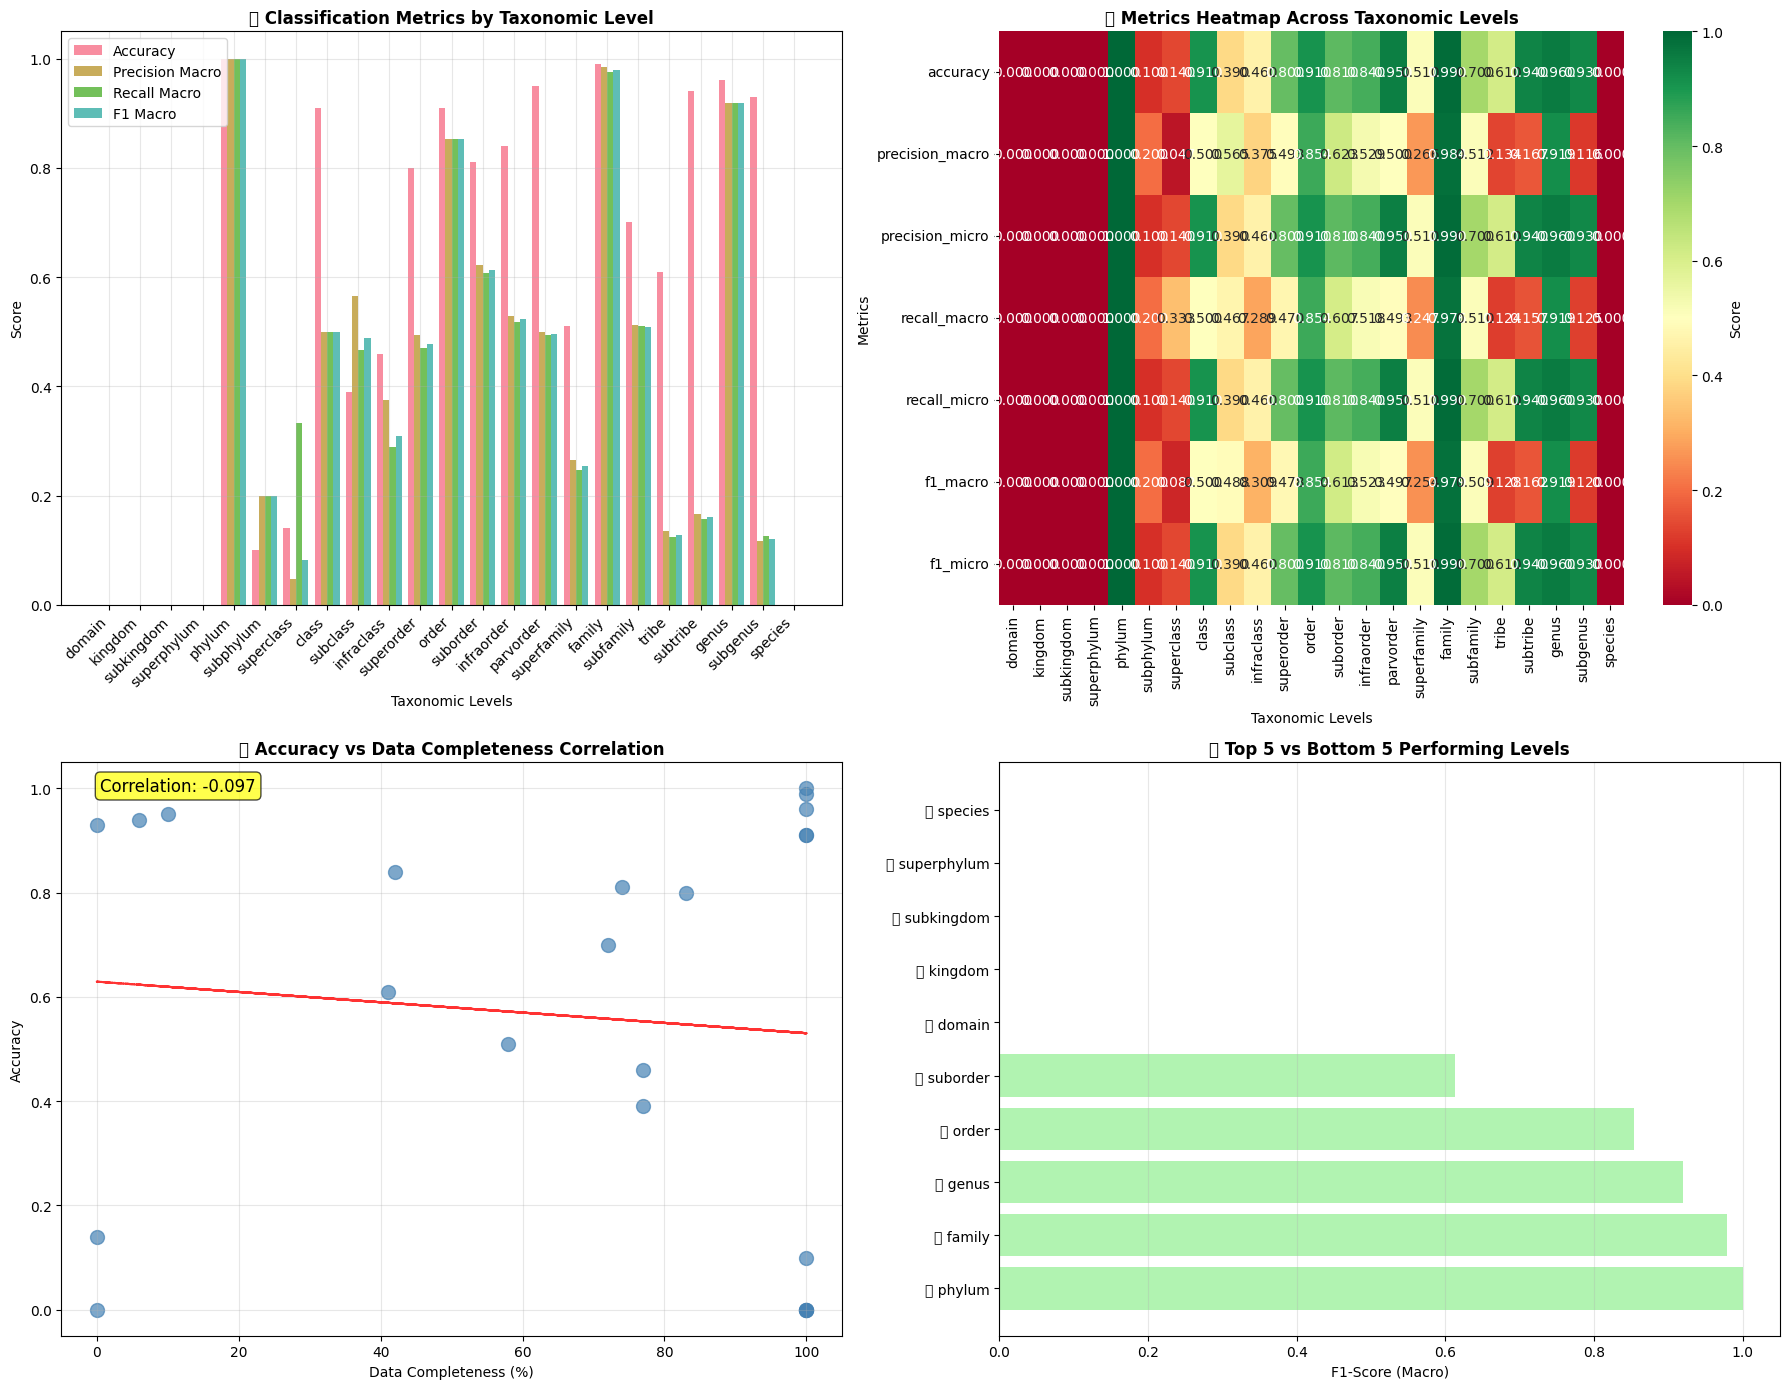

In [26]:
# Create comprehensive visualizations of the results
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Metrics comparison across taxonomic levels
metrics_to_plot = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
x_positions = np.arange(len(taxonomic_levels))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    axes[0,0].bar(x_positions + i*width, metrics_df[metric], width, 
                 label=metric.replace('_', ' ').title(), alpha=0.8)

axes[0,0].set_title('📊 Classification Metrics by Taxonomic Level', fontweight='bold')
axes[0,0].set_xlabel('Taxonomic Levels')
axes[0,0].set_ylabel('Score')
axes[0,0].set_xticks(x_positions + width*1.5)
axes[0,0].set_xticklabels(taxonomic_levels, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Heatmap of all metrics
metrics_heatmap_data = metrics_df[['accuracy', 'precision_macro', 'precision_micro', 
                                  'recall_macro', 'recall_micro', 'f1_macro', 'f1_micro']].T

sns.heatmap(metrics_heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', 
           cbar_kws={'label': 'Score'}, ax=axes[0,1])
axes[0,1].set_title('🎯 Metrics Heatmap Across Taxonomic Levels', fontweight='bold')
axes[0,1].set_xlabel('Taxonomic Levels')
axes[0,1].set_ylabel('Metrics')

# 3. Accuracy vs Data Completeness Correlation
completeness_values = completeness_data['Extracted Data (NCBI/Wikipedia)'].values
accuracy_values = metrics_df['accuracy'].values

axes[1,0].scatter(completeness_values, accuracy_values, s=100, alpha=0.7, c='steelblue')
axes[1,0].set_xlabel('Data Completeness (%)')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('🔗 Accuracy vs Data Completeness Correlation', fontweight='bold')

# Add trend line
z = np.polyfit(completeness_values, accuracy_values, 1)
p = np.poly1d(z)
axes[1,0].plot(completeness_values, p(completeness_values), "r--", alpha=0.8)

# Calculate and display correlation
correlation = np.corrcoef(completeness_values, accuracy_values)[0,1]
axes[1,0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
              transform=axes[1,0].transAxes, fontsize=12, 
              bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
axes[1,0].grid(True, alpha=0.3)

# 4. Top performing vs challenging levels
top_5_levels = metrics_df.nlargest(5, 'f1_macro').index.tolist()
bottom_5_levels = metrics_df.nsmallest(5, 'f1_macro').index.tolist()

performance_data = []
performance_labels = []
performance_colors = []

for level in top_5_levels:
    performance_data.append(metrics_df.loc[level, 'f1_macro'])
    performance_labels.append(f"✅ {level}")
    performance_colors.append('lightgreen')

for level in bottom_5_levels:
    performance_data.append(metrics_df.loc[level, 'f1_macro'])  
    performance_labels.append(f"❌ {level}")
    performance_colors.append('lightcoral')

axes[1,1].barh(range(len(performance_data)), performance_data, color=performance_colors, alpha=0.7)
axes[1,1].set_yticks(range(len(performance_data)))
axes[1,1].set_yticklabels(performance_labels)
axes[1,1].set_xlabel('F1-Score (Macro)')
axes[1,1].set_title('🏆 Top 5 vs Bottom 5 Performing Levels', fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [27]:
# # Generate confusion matrix for selected taxonomic levels
# def create_confusion_matrices():
#     """Create confusion matrices for key taxonomic levels"""
    
#     # Select key levels with reasonable number of classes
#     key_levels = ['class', 'order', 'family', 'genus']
    
#     fig, axes = plt.subplots(2, 2, figsize=(16, 12))
#     axes = axes.flatten()
    
#     for idx, level in enumerate(key_levels):
#         extracted_col = df_extracted_filtered[level].fillna('Unknown')
#         reference_col = df_reference_filtered[level].fillna('Unknown')
        
#         # Get top classes to avoid overcrowded matrix
#         top_classes = reference_col.value_counts().head(8).index.tolist()
        
#         # Filter to top classes only
#         mask = (extracted_col.isin(top_classes)) & (reference_col.isin(top_classes))
#         ext_filtered = extracted_col[mask]
#         ref_filtered = reference_col[mask]
        
#         if len(ext_filtered) > 0:
#             cm = confusion_matrix(ref_filtered, ext_filtered, labels=top_classes)
            
#             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                        xticklabels=top_classes, yticklabels=top_classes, ax=axes[idx])
#             axes[idx].set_title(f'Confusion Matrix - {level.title()}', fontweight='bold')
#             axes[idx].set_xlabel('Predicted (Extracted)')
#             axes[idx].set_ylabel('Actual (Reference)')
#         else:
#             axes[idx].text(0.5, 0.5, 'Insufficient Data', ha='center', va='center',
#                           transform=axes[idx].transAxes, fontsize=16)
#             axes[idx].set_title(f'Confusion Matrix - {level.title()}', fontweight='bold')
    
#     plt.tight_layout()
#     plt.show()

# print("🎯 Creating confusion matrices for key taxonomic levels...")
# create_confusion_matrices()